# Biodiversity in National Parks
***

## Introduction

This analysis uses data about endangered species in different parks from the National Parks Service. The analysis looks at the conservation statuses of these species and investigates if there are any patterns or themes to the types of species that become at risk. The data for this project is *inspired* by real data, but is mostly fictional.

***

**Data source:**

Both `Observations.csv` and `Species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com).

***

Some of the big questions addressed in this analysis:

- *What proportion of each category are `at_risk`?*
    - The categories range from 1.0% to 17.0% `percent_at_risk`. The proportions fall into the categories:
        - `Vascular Plant`: 1.1%
        - `Nonvascular Plant`: 1.5%
        - `Reptile`: 6.4%
        - `Amphibian`: 8.9%
        - `Fish`: 8.8%
        - `Bird`: 15.4%
        - `Mammal`: 17.0%
- *Are certain categories more likely to be `at_risk`?*
    - Mammals are more likely to be at risk than Reptiles, Nonvascular Plants, and Vascular Plants.
    - Mammals are not more likely to be at risk than Birds, Fish, and Amphibians.
- *How often were the most frequently observed animals (Bats, Hawks, Warblers, Wolves, Sparrows, and Snakes) seen at each National Park, and how many observations were of `at_risk` animals?*
    - Of the most frequently observed animals, Warblers are observed the most but are also one of the least at risk; as expected, Bats are most at risk.
***
The rest of the analysis goes more into the methods, analysis, and results behind each of the questions above.

***
### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

%matplotlib inline

### Load and Inspect the Data

***
##### *What columns make up the dataframes?*

In [2]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The `species` dataframe has information on the different species in National Parks. The columns are:
- *category:* The category of taxonomy for each species
- *scientific_name:* The scientific name of each species
- *common_names:* The common names of each species
- *conservation_status:* The species conservation status

In [3]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `observations` dataframe has information from recorded sightings of different species throughout national parks in the past 7 days. The columns are:
- *scientific_name:* The scientific name of each species
- *park_name:* The name of the national park
- *observations:* The number of observations in the past 7 days

***
##### *What shape are the dataframes?*

In [4]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


The `species` dataframe contains 5,824 rows and 4 columns.
The `observations` dataframe contains 23,296 rows and 3 columns.

***
### Explore `species` Data

***
##### *How many species are represented in the dataframe?*

In [5]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


The 5,541 unique scientific names indicate the dataframe contains this many unique species.

***
##### *What values does the `category` column contain?*

In [6]:
print(f"categories: {species.category.unique()}")

categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The `category` column contains the 7 values: `Mammal`, `Bird`, `Reptile`, `Amphibian`, `Fish`, `Vascular Plant`, and `Nonvascular Plant`.

***
##### *How many species are contained in each `category`?*

In [7]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

The `Vascular Plant` category contains the most species by far with 4,470. The `Bird` category is second containing 521 species.

***
##### *What values does the `conservation_status` column contain?*

In [8]:
print(f"unique conservation statuses: {species.conservation_status.unique()}")

unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In order of gravity, the `conservation_status` column contains the 4 values: `nan`, `Species of Concern`, `In Recovery` `Threatened`, `Endangered`.

***
##### *How many `nan` values does the `conservation_status` column contain?*

In [9]:
print(f"na values:{species.conservation_status.isna().sum()}")

na values:5633


The `conservation_status` column contains 5,633 `nan` values; the absence of data here indicates these species are not under any conservation status.

***
##### *How many species make up each `conservation_status`?*

In [10]:
species.conservation_status.value_counts().to_frame()

,conservation_status
Species of Concern,161
Endangered,16
Threatened,10
In Recovery,4


The majority of species are not at risk. There are 161 `Species of Concern`, 16 `Endangered`, 10 `Threatened`, and 4 `In Recovery`. 

To allow further analysis based on gravity, the `nan` values must be replaced with `Low Risk` and the conservation statuses sorted and applied as sorted categoricals.

In [11]:
#replace nan values
species.fillna("Low Risk", inplace=True)

#sort conservation statuses
species.conservation_status = pd.Categorical(species.conservation_status,\
                                             categories=["Low Risk", "Species of Concern", "In Recovery",\
                                                        "Threatened", "Endangered"], ordered=True)

***
##### *How many at risk species from each `category` make up each `conservation_status`?*

In [12]:
#create endangered dataframe for both species and merged_df
endangered_species = species[~ species.conservation_status.isin(['Low Risk'])].copy()

#remove low risk from categories
endangered_species.conservation_status = endangered_species.conservation_status.cat.remove_unused_categories()

endangered_species.conservation_status.value_counts(dropna=False).to_frame()

,conservation_status
Species of Concern,161
Endangered,16
Threatened,10
In Recovery,4


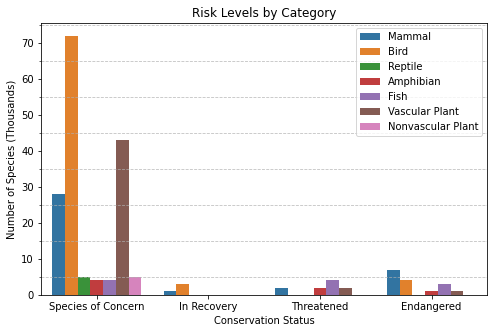

<Figure size 432x288 with 0 Axes>

In [13]:
#create countplot
plt.figure(figsize=[8, 5])
sns.countplot(data=endangered_species, x="conservation_status", hue="category")
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species (Thousands)')
plt.grid(which='minor', linestyle='--', alpha=0.8)
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
plt.title('Risk Levels by Category')
plt.legend(loc='upper right')

plt.show()
plt.clf()

Both `Nonvascular Plant` and `Reptile` are only in risk level `Species of Concern`. All other categories have species in at least 3 different risk levels. Of the species in `Species of Concern` risk level, `Bird`, `Vascular Plant`, and `Mammal` are the largest categories, respectively.

***
### Explore `observations` Data

***
##### *What parks does the `park_name` column contain?*

In [14]:
print(f"unique parks:{observations.park_name.unique()}")

unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


The `park_name` column contains the 4 parks: `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, `Yellowstone National Park`.

Since each entry in the `park_name` column ends with `National Park`, the string should be removed to save space.

In [15]:
#remove 'national park' from park_name
observations.park_name = observations.park_name.str.replace('national park','', case=False)

***
##### *How many observations are represented in the dataframe?*

In [16]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


The dataframe contains 3,314,739 observations.

***
### Join `species` and `observations` dataframes into a single dataframe

Joining the two dataframes will allow for a more in depth analysis. Only the highest risk (or worst case) conservation status for each duplicated species will be kept in the joined dataframe.

***
##### *How many duplicates does the dataframe contain?*

In [17]:
#collect duplicates
species_duplicates = species[species.scientific_name.duplicated(keep=False)]
print(f"Duplicates: {len(species_duplicates)}")

Duplicates: 557


In [18]:
#example before duplicate removal
before = species[species.scientific_name.str.contains("Canis lupus")].reset_index(drop=True)
before = before.style.set_caption("Canis Lupus duplicates before removal")

#drop duplicates
species.drop_duplicates(inplace=True, subset="scientific_name", keep="first")
species.reset_index(drop=True, inplace=True)

before

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis lupus,Gray Wolf,Endangered
1,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
2,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [19]:
#separate out worst cases
worst_cases = species_duplicates.groupby("scientific_name").conservation_status.max()

#update the status for each duplicate kept
for name, highest_risk in worst_cases.iteritems():
    species.conservation_status[species.scientific_name == name] = highest_risk
    
#example after duplicate removal
after = species[species.scientific_name.str.contains("Canis lupus")].reset_index(drop=True)
after = after.style.set_caption("Canis Lupus duplicates after removal")

after

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis lupus,Gray Wolf,Endangered


In [20]:
#merge dataframes
merged_df = species.merge(observations, on="scientific_name", how="outer")

merged_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",Low Risk,Yosemite,128


***
### Explore Merged Data

***
##### *How frequently was each `category` observed?*

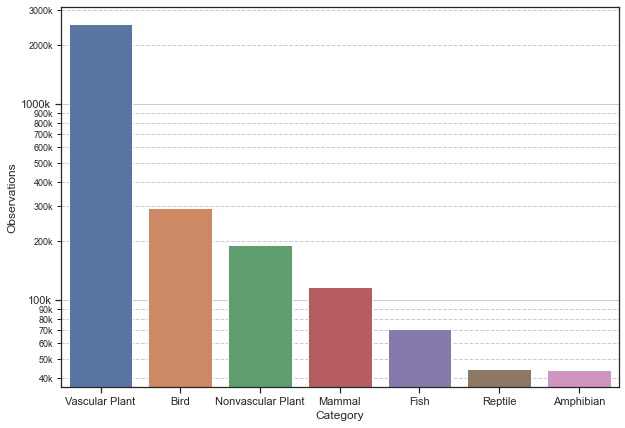

,category,observations
0,Vascular Plant,2555090
1,Bird,292833
2,Nonvascular Plant,190653
3,Mammal,116696
4,Fish,70818
5,Reptile,44678
6,Amphibian,43971


<Figure size 432x288 with 0 Axes>

In [21]:
#theme preferences
sns.set_theme(style='ticks', rc={'axes.grid': True})

#create grouped frame with category and observations
cat_obs_df = merged_df[['category', 'observations']].groupby('category').sum()\
                                                      .sort_values('observations', ascending=False)\
                                                      .reset_index()

#create bar plot
plt.figure(figsize=[10, 7])
sns.barplot(x=cat_obs_df.category, y=cat_obs_df.observations)
plt.xlabel('Category')
plt.ylabel('Observations')
plt.yscale('log')
plt.grid(which='minor', linestyle='--')
plt.gca().yaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
plt.gca().yaxis.set_minor_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
plt.tick_params(which='minor', labelsize = 9)

plt.show()
plt.clf()

#show table
cat_obs_df

`Vascular Plant` is the most frequently spotted category, and `Bird` is the most frequently spotted animal.

***
##### *How many observations occurred in each National Park?*

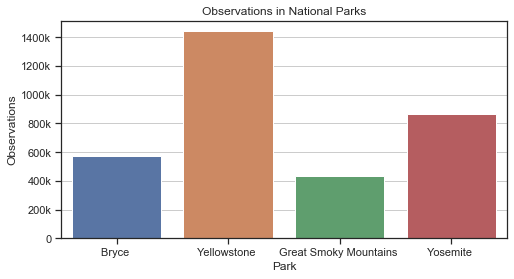

<Figure size 432x288 with 0 Axes>

In [22]:
#create dataframe with parks and observations
obs_park_df = merged_df.pivot_table(index='park_name', columns='category', values='observations', aggfunc=sum)
#convert values to percentage
obs_park_df = obs_park_df.apply(lambda x: x/x.sum()*100, axis=1)
#adjust row/column description
obs_park_df.rename_axis('Park name', inplace=True)
obs_park_df.rename_axis('Category', axis='columns', inplace=True)

#create bar plot of absolute values of observations
plt.figure(figsize=[8, 4])
sns.barplot(data=merged_df, x='park_name', y='observations', estimator=sum, ci=None)
plt.xlabel('Park')
plt.ylabel('Observations')
plt.grid(b=True, which='minor', linestyle='--', alpha=0.8)
plt.gca().yaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
plt.gca().yaxis.set_minor_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
plt.title('Observations in National Parks')

plt.show()
plt.clf()

Most observations (about 1.41 million) occurrecd in Yellowstone National Park. Great Smoky Mountains National Park

***
##### *What proportion of observations occurred at each National Park?*

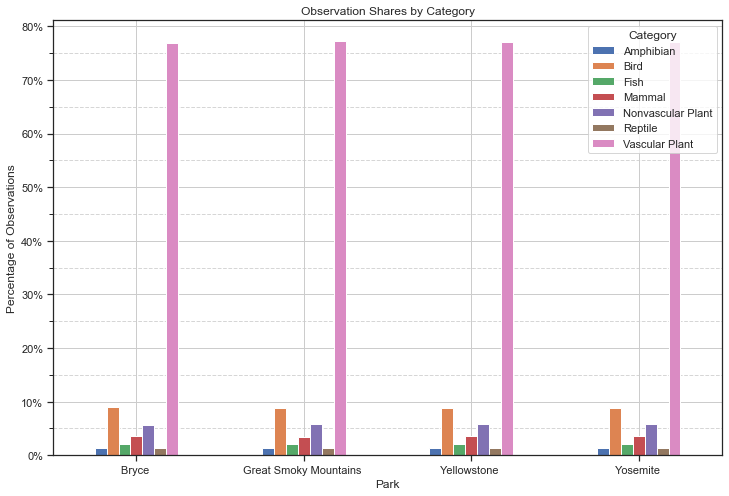

Category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
Park name,,,,,,,
Bryce,1.3%,9.0%,2.2%,3.6%,5.7%,1.4%,76.9%
Great Smoky Mountains,1.3%,8.7%,2.1%,3.5%,5.8%,1.3%,77.3%
Yellowstone,1.3%,8.8%,2.1%,3.5%,5.8%,1.4%,77.1%
Yosemite,1.3%,8.8%,2.2%,3.5%,5.8%,1.3%,77.1%


<Figure size 432x288 with 0 Axes>

In [23]:
#bar plot percentages
obs_park_df.plot(kind='bar', stacked=False, figsize=[12, 8])
plt.xlabel('Park')
plt.ylabel('Percentage of Observations')
plt.grid(b=True, which='minor', linestyle='--', alpha=0.8)
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}%'.format(x))
plt.xticks(rotation=0)
plt.title('Observation Shares by Category')

plt.show()
plt.clf()

#show table
display(obs_park_df.style
        .format("{:.1f}%")
        .set_caption('Observation percentages'))

The proportion of observations is nearly identical across the National Parks in the dataset. This effect may become apparrent in the remaining analysis.

***
##### *What are the most frequent names in the merged dataframe?*

Since we're only interested in species at risk, two new dataframes must be created which exclude the `Low Risk` value from the `conservation_status` column.

In [24]:
#create endangered dataframe for merged_df
endangered_obs = merged_df[~ merged_df.conservation_status.isin(['Low Risk'])].copy()

#remove low risk from categories
endangered_obs.conservation_status = endangered_obs.conservation_status.cat.remove_unused_categories()

#create a bag of words with all words from common names in observations
bag_words = endangered_obs.common_names.str.replace(',', '').str.split('\s')
# Create a list of words
names_words = []
for index, words in bag_words.iteritems():
    names_words.extend(words)
#find value counts
names_words = pd.Series(names_words, name='word_count')
word_count = names_words.value_counts().to_frame() 
#look at first 20
display(word_count[:20].style.set_caption('Top 20 Frequent Words'))

,word_count
Myotis,96
Bat,60
Brown,40
California,28
Northern,28
Mountain,28
American,28
Little,24
Badger,16
Warbler,16


It appears the following at risk animals are most frequently observed:
- Bats
- Hawks
- Warblers
- Wolves
- Badgers
- Sparrows
- Snakes

***
## Analysis

***
##### *Are certain categories more likely to be at risk?*

In [25]:
#create at_risk column
merged_df['at_risk'] = merged_df.conservation_status != 'Low Risk'
merged_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations,at_risk
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Bryce,130,False
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Yellowstone,270,False
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Great Smoky Mountains,98,False
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Low Risk,Yosemite,117,False
4,Mammal,Bos bison,"American Bison, Bison",Low Risk,Yosemite,128,False


In [75]:
#create a pivot table showing counts at risk by category
risk_pivot = merged_df.groupby(['category', 'at_risk'])\
                .scientific_name.nunique().reset_index()\
                .pivot(index='category',\
                       columns='at_risk',\
                       values='scientific_name')\
                .reset_index()
risk_pivot.columns = ['category', 'not_at_risk', 'at_risk']

#risk_pivot

In [76]:
#add percent_protected as a pivot table column
risk_pivot['percent_at_risk'] = risk_pivot.at_risk / \
                                      (risk_pivot.at_risk + risk_pivot.not_at_risk) * 100

risk_pivot

,category,not_at_risk,at_risk,percent_at_risk
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,114,11,8.800000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


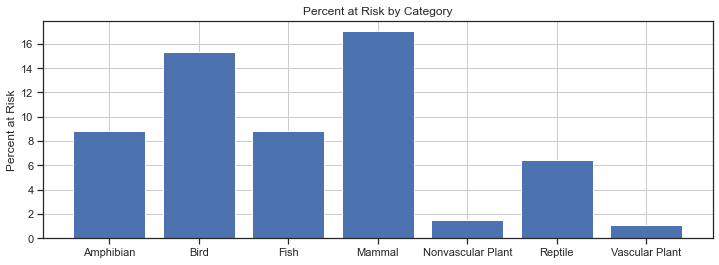

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(12, 4))
ax= plt.subplot()
plt.bar(range(len(risk_pivot)), risk_pivot.percent_at_risk.values)
ax.set_xticks(range(len(risk_pivot)))
ax.set_xticklabels(risk_pivot.category.values)
plt.ylabel("Percent at Risk")
plt.title("Percent at Risk by Category")

plt.show()
plt.clf()

The categories range from 1% to 17% `percent_at_risk`. Mammals are the most (17%) at risk, and Birds are close at 15.4% at risk. The `Plant` cagetories are the least at risk at 1.1% and 1.5%.

***
##### *Which differences between `not_at_risk` and `at_risk` are significant?*
- *Is the difference between `Mammal` and `Bird` significant?*
- *Is the difference between `Mammal` and `Fish` significant?*
- *Is the difference between `Mammal` and `Reptile` significant?*

In [29]:
#run chi-squared contingency tests 
from scipy.stats import chi2_contingency

#mammal to bird contingency test
contingency1 = [[30, 146],
                [75, 413]]
chi2, pval, dof, expected = chi2_contingency(contingency1)
if pval < .05:
    print("Mammal to Bird p-value:")
    print(pval)
    print("significant")
else:
    print("Mammal to Bird p-value:")
    print(pval)
    print("not significant")

Mammal to Bird p-value:
0.6875948096661336
not significant


In [30]:
#mammal to fish contingency test
contingency2 = [[30, 146],
                [11, 115]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
if pval < .05:
    print("Mammal to Fish p-value:")
    print(pval)
    print("significant")
else:
    print("Mammal to Fish p-value:")
    print(pval)
    print("not significant")

Mammal to Fish p-value:
0.0561483484489001
not significant


In [31]:
#mammal to reptile contingency test
contingency3 = [[30, 146],
                [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency3)
if pval < .05:
    print("Mammal to Reptile p-value:")
    print(pval)
    print("significant")
else:
    print("Mammal to Reptile p-value:")
    print(pval)
    print("not significant")

Mammal to Reptile p-value:
0.03835559022969898
significant


The difference between `Mammal` and `Reptile` is statistically significant as indicated by p-value 0.038. This is the smallest significant difference for `Mammal` in `conservation_status` rates.

***
##### *How frequently were Bats observed at each National Park?*

In [32]:
#create column identifying bats
merged_df['is_bat'] = merged_df.common_names.str.contains(r"\bBat\b", regex = True)

In [33]:
#create a dataframe containing all bat observations
bat_observations = merged_df[merged_df.is_bat]
#display(bat_observations.head().style.set_caption('All Bat Observations'))

In [34]:
#aggregate the number of observations by national park
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,2310
1,Great Smoky Mountains,1687
2,Yellowstone,5771
3,Yosemite,3311


Most bat observations (5,771) occurred at Yellowstone National Park; the least observations (1,687) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Bats?*

In [35]:
#create a table differentiating at_risk status at each park
bat_obs_by_park = bat_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
bat_obs_by_park['animal'] = 'bat'
bat_obs_by_park

,park_name,at_risk,observations,animal
0,Bryce,False,1183,bat
1,Bryce,True,1127,bat
2,Great Smoky Mountains,False,970,bat
3,Great Smoky Mountains,True,717,bat
4,Yellowstone,False,3045,bat
5,Yellowstone,True,2726,bat
6,Yosemite,False,1786,bat
7,Yosemite,True,1525,bat


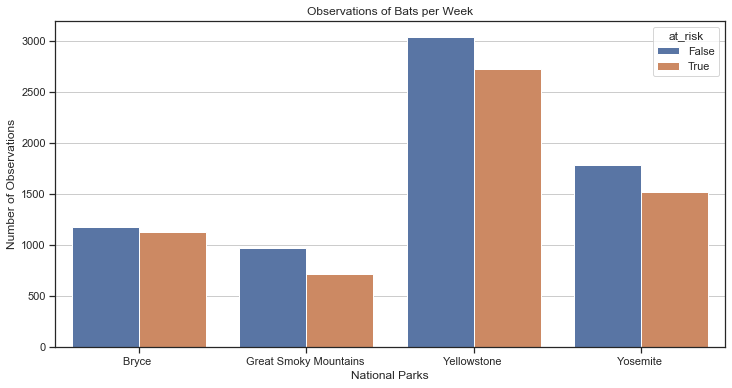

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bat_obs_by_park.park_name, y= bat_obs_by_park.observations, hue=bat_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` bats is lower than those not at risk. This difference is smallest at Bryce National Park (56) and largest at Yellowstone (253).

***
##### *How frequently were Hawks observed at each National Park?*

In [37]:
#create column identifying hawks
merged_df['is_hawk'] = merged_df.common_names.str.contains(r"\bHawk\b", regex = True)
#merged_df.head(10)

In [38]:
#create a dataframe containing all hawk observations
hawk_observations = merged_df[merged_df.is_hawk]
#display(hawk_observations.head().style.set_caption('All Hawk Observations'))

In [39]:
#aggregate the number of observations by national park
hawk_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,1253
1,Great Smoky Mountains,950
2,Yellowstone,3211
3,Yosemite,1842


Most hawk observations (3,211) occurred at Yellowstone National Park; the least observations (950) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Hawks?*

In [40]:
#create a table differentiating at_risk status at each park
hawk_obs_by_park = hawk_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
hawk_obs_by_park['animal'] = 'hawk'
#hawk_obs_by_park

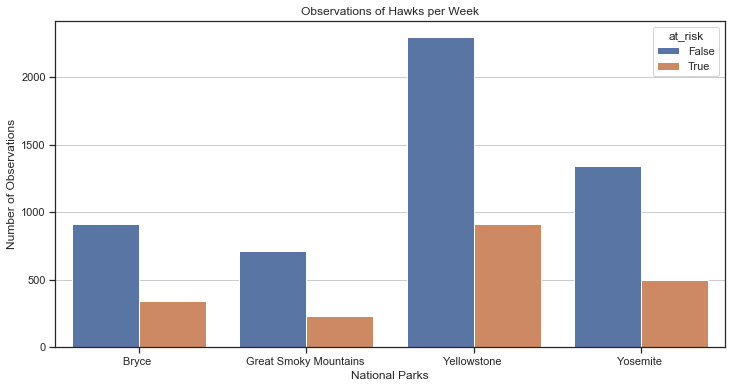

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hawk_obs_by_park.park_name, y= hawk_obs_by_park.observations, hue=hawk_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Hawks per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` hawks is lower than those not at risk. This difference is smallest at Great Smoky Mountains National Park (482) and largest at Yellowstone (1,389).

***
##### *How frequently were Warblers observed at each National Park?*

In [42]:
#create column identifying warblers
merged_df['is_warb'] = merged_df.common_names.str.contains(r"\bWarbler\b", regex = True)
#merged_df.head(10)

In [43]:
#create a dataframe containing all warbler observations
warb_observations = merged_df[merged_df.is_warb]
#display(warb_observations.head().style.set_caption('All Warbler Observations'))

In [44]:
#aggregate the number of observations by national park
warb_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,5760
1,Great Smoky Mountains,4435
2,Yellowstone,14487
3,Yosemite,8712


Most warbler observations (14,487) occurred at Yellowstone National Park; the least observations (4,435) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Warblers?*

In [45]:
#create a table differentiating at_risk status at each park
warb_obs_by_park = warb_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
warb_obs_by_park['animal'] = 'warbler'
#warb_obs_by_park

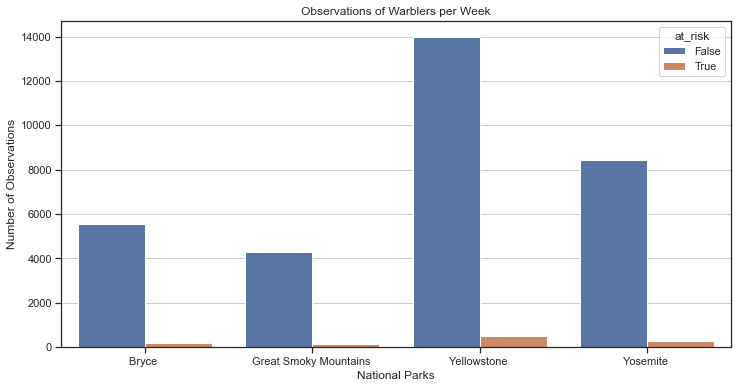

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x=warb_obs_by_park.park_name, y= warb_obs_by_park.observations, hue=warb_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` warblers is lower than those not at risk. This difference is smallest at Great Smoky Mountains National Park (4,145) and largest at Yellowstone (13,503).

***
##### *How frequently were Wolves observed at each National Park?*

In [47]:
#create column identifying wolves
merged_df['is_wolf'] = merged_df.common_names.str.contains(r"\bWolf\b", regex = True)
#merged_df.head(10)

In [48]:
#create a dataframe containing all wolf observations
wolf_observations = merged_df[merged_df.is_wolf]
#display(wolf_observations.head().style.set_caption('All Wolf Observations'))

In [49]:
#aggregate the number of observations by national park
wolf_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,540
1,Great Smoky Mountains,264
2,Yellowstone,1122
3,Yosemite,658


Most wolf observations (1122) occurred at Yellowstone National Park; the least observations (264) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Wolves?*

In [50]:
#create a table differentiating at_risk status at each park
wolf_obs_by_park = wolf_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
wolf_obs_by_park['animal'] = 'wolf'
#wolf_obs_by_park

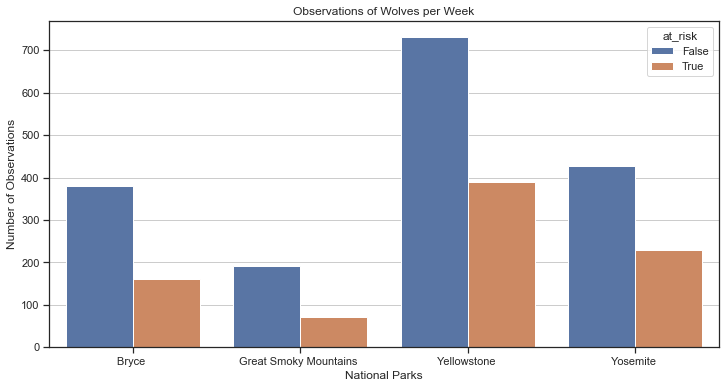

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x=wolf_obs_by_park.park_name, y= wolf_obs_by_park.observations, hue=wolf_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Wolves per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` wolves is lower than those not at risk. This difference is smallest at Great Smoky Mountains National Park (120) and largest at Yellowstone (342).

***
##### *How frequently were Badgers observed at each National Park?*

In [52]:
#create column identifying badgers
merged_df['is_badg'] = merged_df.common_names.str.contains(r"\bBadger\b", regex = True)
#merged_df.head(10)

In [53]:
#create a dataframe containing all badger observations
badg_observations = merged_df[merged_df.is_badg]
#display(badg_observations.head().style.set_caption('All Badger Observations'))

In [54]:
#aggregate the number of observations by national park
badg_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,159
1,Great Smoky Mountains,137
2,Yellowstone,449
3,Yosemite,255


Most badger observations (449) occurred at Yellowstone National Park; the least observations (137) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Badgers?*

In [55]:
#create a table differentiating at_risk status at each park
badg_obs_by_park = badg_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
badg_obs_by_park['animal'] = 'badger'
#badg_obs_by_park

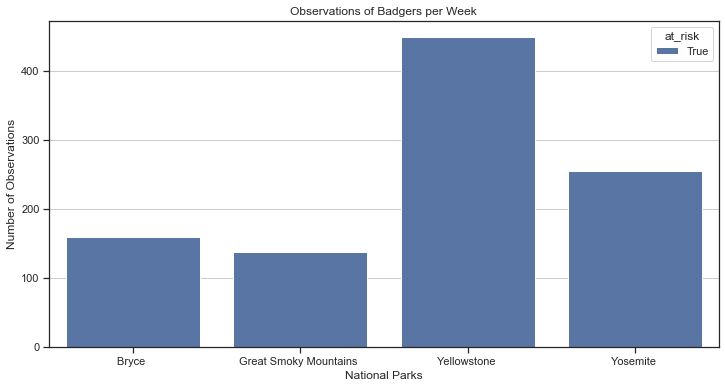

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x=badg_obs_by_park.park_name, y= badg_obs_by_park.observations, hue=badg_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Badgers per Week')

plt.show()
plt.clf()

All badgers observed are `at_risk`. This may be useful information for conservationists.

***
##### *How frequently were Sparrows observed at each National Park?*

In [57]:
#create column identifying sparrows
merged_df['is_spar'] = merged_df.common_names.str.contains(r"\bSparrow\b", regex = True)
#merged_df.head(10)

In [58]:
#create a dataframe containing all sparrow observations
spar_observations = merged_df[merged_df.is_spar]
#display(spar_observations.head().style.set_caption('All Sparrow Observations'))

In [59]:
#aggregate the number of observations by national park
spar_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,2777
1,Great Smoky Mountains,2134
2,Yellowstone,7027
3,Yosemite,4340


Most sparrow observations (7,027) occurred at Yellowstone National Park; the least observations (2,134) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Sparrows?*

In [60]:
#create a table differentiating at_risk status at each park
spar_obs_by_park = spar_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
spar_obs_by_park['animal'] = 'sparrow'
#spar_obs_by_park

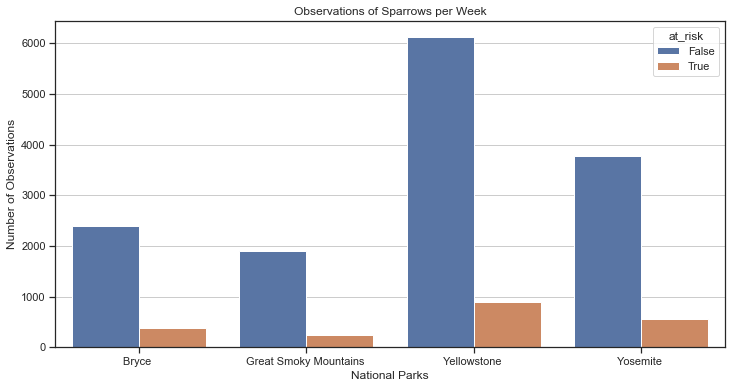

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x=spar_obs_by_park.park_name, y= spar_obs_by_park.observations, hue=spar_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Sparrows per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` sparrows is lower than those not at risk. This difference is smallest at Great Smoky Mountains National Park (1,650) and largest at Yellowstone (5,233).

***
##### *How frequently were Snakes observed at each National Park?*

In [62]:
#create column identifying snakes
merged_df['is_snek'] = merged_df.common_names.str.contains(r"\bSnake\b", regex = True)

In [63]:
#create a dataframe containing all hawk observations
snek_observations = merged_df[merged_df.is_snek]
#display(snek_observations.head().style.set_caption('All Snake Observations'))

In [64]:
#aggregate the number of observations by national park
snek_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,3344
1,Great Smoky Mountains,2374
2,Yellowstone,8149
3,Yosemite,4823


Most snake observations (8,149) occurred at Yellowstone National Park; the least observations (2,374) occurred at Great Smoky Mountains National Park.

***
##### *How many of the observations at each National Park were of `at_risk` Snakes?*

In [65]:
#create a table differentiating at_risk status at each park
snek_obs_by_park = snek_observations.groupby(['park_name', 'at_risk']).observations.sum().reset_index()
snek_obs_by_park['animal'] = 'snake'
snek_obs_by_park

,park_name,at_risk,observations,animal
0,Bryce,False,3115,snake
1,Bryce,True,229,snake
2,Great Smoky Mountains,False,2199,snake
3,Great Smoky Mountains,True,175,snake
4,Yellowstone,False,7503,snake
5,Yellowstone,True,646,snake
6,Yosemite,False,4396,snake
7,Yosemite,True,427,snake


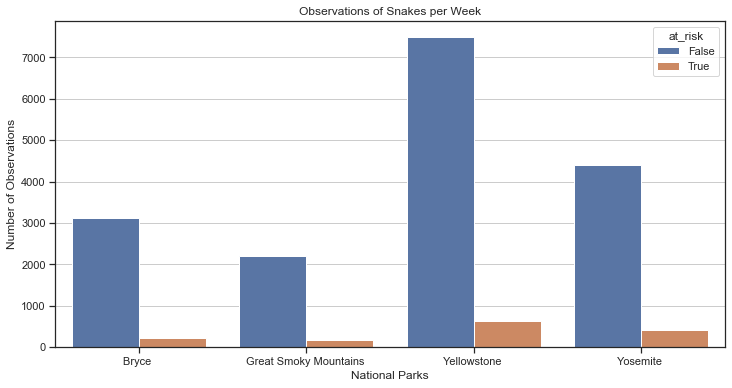

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x=snek_obs_by_park.park_name, y= snek_obs_by_park.observations, hue=snek_obs_by_park.at_risk)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Snakes per Week')

plt.show()
plt.clf()

At all National Parks in the dataframe, the number of `at_risk` snakes is lower than those not at risk. This difference is smallest at Great Smoky Mountains National Park (2,024) and largest at Yellowstone (6,857).

***
##### *How often were the most frequently observed animals (Bats, Hawks, Warblers, Wolves, Sparrows, and Snakes) seen at each National Park, and how many observations were of `at_risk` animals?*

In [67]:
all_obs_by_park_stacked = pd.concat([bat_obs_by_park, hawk_obs_by_park, warb_obs_by_park,\
                                     wolf_obs_by_park, spar_obs_by_park, snek_obs_by_park],\
                                    ignore_index=True)

#all_obs_by_park_stacked.head(10)

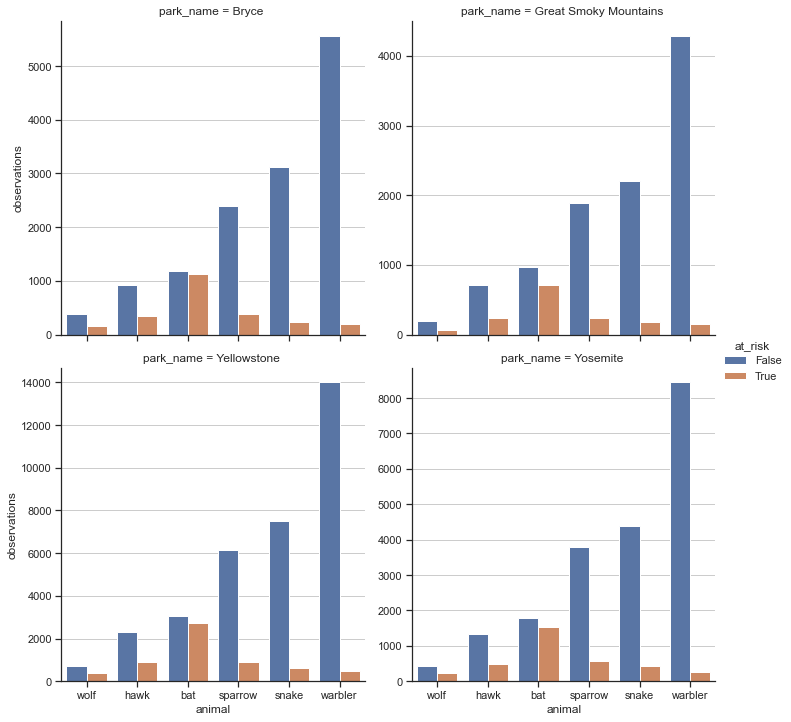

In [78]:
order_list = ['wolf', 'hawk', 'bat', 'sparrow', 'snake', 'warbler']
sns.catplot(x='animal', y='observations', hue='at_risk', data=all_obs_by_park_stacked, \
            col='park_name', col_wrap=2, order=order_list, kind='bar', height=5, aspect=1.0, sharey=False)

As noted previously in the fictional dataset analysis, observations rates are nearly identical across the National Parks. Of the most frequently observed animals, warblers are observed the most but are also one of the least at risk; as expected, bats are most at risk.

***
## Conclusions

The project was able to make several insights into the various species across the four National Parks that comprised this data set. The analysis answered the following questions:
- *What proportion of each category are `at_risk`?*
    - The categories range from 1.0% to 17.0% `percent_at_risk`. The proportions fall into the categories:
        - `Vascular Plant`: 1.1%
        - `Nonvascular Plant`: 1.5%
        - `Reptile`: 6.4%
        - `Amphibian`: 8.9%
        - `Fish`: 8.8%
        - `Bird`: 15.4%
        - `Mammal`: 17.0%
- *Are certain categories more likely to be at risk?*
    - *Are Mammals more likely to be at risk than Birds?*
        - Mammals are not more likely to be at risk than Birds as indicated by p-value 0.688.
    - *Are Mammals more likely to be at risk than Fish?*
        - Mammals are not more likely to be at risk than Fish as indicated by p-value 0.056.
    - *Are Mammals more likely to be at risk than Reptiles?*
        - Mammals are more likely to be at risk than Reptiles as indicated by p-value 0.038. 
        - We can deduce that Mammals are also more likely to be at risk than Nonvascular and Vascular Plants.
        - We can also deduce that Mammals are not more likely to be at risk than Birds, Fish, and Amphibians.
- *How often were the most frequently observed animals (Bats, Hawks, Warblers, Wolves, Sparrows, and Snakes) seen at each National Park, and how many observations were of `at_risk` animals?*
    - Of the most frequently observed animals, Warblers are observed the most but are also one of the least at risk; as expected, Bats are most at risk.